# Model Time

### Elastic Net

{'rmse': 0.4829223205063652, 'mse': 0.23321396764325253, 'best_lambda': 100.0, 'best_l1_ratio': 0.24000000000000002}


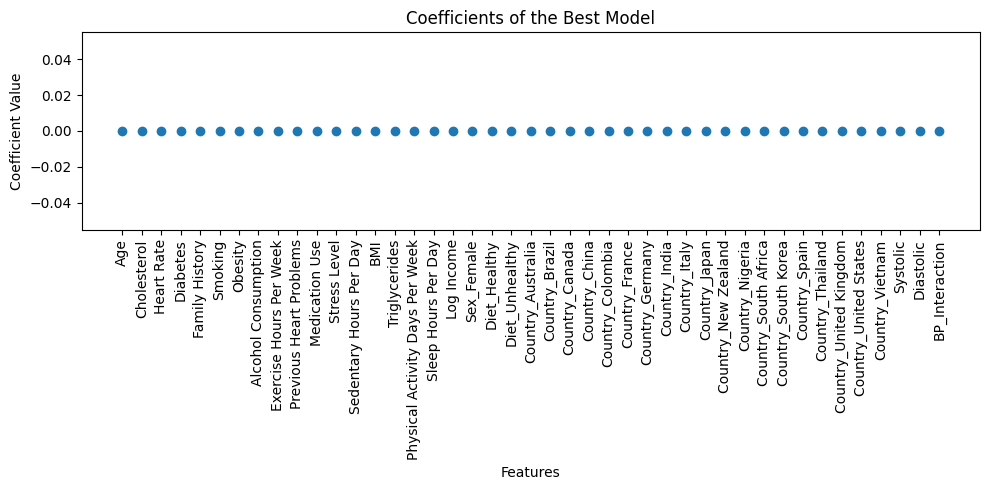

In [15]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def elastic_net_search(X_train, y_train, X_test, y_test):
    # Setup ElasticNetCV with more iterations
    model = ElasticNetCV(cv=5, l1_ratio=np.linspace(0.01, 1, 100), alphas=np.logspace(-6, 2, 100), 
                         max_iter=5000, tol=0.0001, random_state=42)
    
    model.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred = model.predict(X_test)
    
    # Calculating RMSE and MSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    
    results = {
        'rmse': rmse,
        'mse': mse,
        'best_lambda': model.alpha_,
        'best_l1_ratio': model.l1_ratio_
    }
    
    return results

results = elastic_net_search(X_train, y_train, X_test, y_test)
print(results)

# Plotting coefficients of the best model
best_model = ElasticNetCV(cv=5, l1_ratio=results['best_l1_ratio'], alphas=[results['best_lambda']], 
                          max_iter=5000, tol=0.01, random_state=42)

best_model.fit(X_train, y_train)
coefficients = best_model.coef_

plt.figure(figsize=(10, 5))
plt.plot(coefficients, marker='o', linestyle='none')
plt.title('Coefficients of the Best Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(ticks=np.arange(len(coefficients)), labels=X.columns, rotation=90)
plt.tight_layout()
plt.show()

### SVM w RBF

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM with RBF kernel: {accuracy}')

NameError: name 'X_train_scaled' is not defined

### Neural Network

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

def calculate_rmse(model, data_loader):
    model.eval()  # Set model to evaluation mode
    predictions, actuals = [], []
    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            predicted_classes = torch.softmax(outputs, dim=1).max(dim=1)[1]
            predictions.extend(predicted_classes.numpy())
            actuals.extend(targets.numpy())
    return np.sqrt(mean_squared_error(actuals, predictions))


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Same DataLoader can be used
nn_model = SimpleNN()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)

# Training loop with RMSE evaluation
for epoch in range(epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = nn_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    
    # Calculate RMSE on validation set
    val_rmse = calculate_rmse(model, val_loader)
    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val RMSE: {val_rmse}')

### Transformer Network

In [ ]:
# Hyperparameters
input_dim = X_train.shape[1]  # Number of features
num_classes = len(set(y))     # Number of classes
num_heads = 2                 # Number of heads in multi-head attention mechanism
num_layers = 1                # Number of transformer layers
dropout_rate = 0.1            # Dropout rate
batch_size = 32               # Batch size for training

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads, num_layers, dropout_rate):
        super(TransformerModel, self).__init__()
        self.transformer_layer = nn.TransformerEncoderLayer(
            d_model=input_dim, nhead=num_heads, dropout=dropout_rate
        )
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_layer, num_layers=num_layers)
        self.classifier = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = torch.mean(x, dim=1)  # Average pooling
        output = self.classifier(x)
        return output

# Dataset and DataLoader
train_dataset = TensorDataset(torch.tensor(X_train_scaled).float(), torch.tensor(y_train).long())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Model instantiation
model = TransformerModel(input_dim, num_classes, num_heads, num_layers, dropout_rate)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
# Training loop with RMSE evaluation
for epoch in range(epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    
    # Calculate RMSE on validation set
    val_rmse = calculate_rmse(model, val_loader)
    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val RMSE: {val_rmse}')